In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [121]:
#we define first the value of h and the corresponding range in x
h=0.2
n_points = int((4000.0)/h)
t = zeros(n_points)
XI = zeros(n_points)
LI = zeros(n_points)
EA = zeros(n_points)
CL = zeros(n_points)
gLI=0.0231 #real, not checked
gXI=0.006  #real, checked 
aX=0.004691138 #real, checked 
bS=300 #typical value 
kS=3000 #typical value 
aL=10 #typical (adjusted) value 
bL=400 #it could be between 100 and 400, not checked
kL=4000 #typical value 
gEHi=1 #real, not checked , bad value :/ 
size(CL)

20000

In [122]:
#definimos todas las ecuaciones 
def func_XI_prime(t,XI,LI,EA,CL):
    return aS+((bS*pow(CL,2))/(pow(CL,2)+pow(kS,2)))-(gXI)*XI
def func_LI_prime(t,XI,LI,EA,CL):
    return aS+((bS*pow(CL,2))/(pow(CL,2)+pow(kS,2)))-(gLI)*LI
def func_EA_prime(t,XI,LI,EA,CL):
    return aL+((bL)/(1.0+(pow(LI,2)/pow(kL,2))))-(gEHi)*EA

In [123]:
t[0] = 0.0
XI[0] = 0.0
LI[0] = 0.0
EA[0] = 0.0
CL[0] = 0.0

for i in range(1400):
    CL[i]=0.0
for i in range(1401,n_points):
    CL[i]=4000*sin(t[i]/300)+4000

    
for i in range(1,n_points):
  
    k1_XI = func_XI_prime(t[i-1],XI[i-1],LI[i-1],EA[i-1],CL[i-1])
    k1_LI = func_LI_prime(t[i-1],XI[i-1],LI[i-1],EA[i-1],CL[i-1])
    k1_EA = func_EA_prime(t[i-1],XI[i-1],LI[i-1],EA[i-1],CL[i-1])

    #first step
    t1 = t[i-1] + (h/2.0)
    XI1 = XI[i-1] + (h/2.0) * k1_XI
    LI1 = LI[i-1] + (h/2.0) * k1_LI
    EA1 = EA[i-1] + (h/2.0) * k1_EA

    k2_XI = func_XI_prime(t1,XI1,LI1,EA1,CL[i-1])
    k2_LI = func_LI_prime(t1,XI1,LI1,EA1,CL[i-1])
    k2_EA = func_EA_prime(t1,XI1,LI1,EA1,CL[i-1])


    #second step
    t2 = t[i-1] + (h/2.0)
    XI2 = XI[i-1] + (h/2.0) * k2_XI
    LI2 = LI[i-1] + (h/2.0) * k2_LI
    EA2 = EA[i-1] + (h/2.0) * k2_EA
     
    k3_XI = func_XI_prime(t2,XI2,LI2,EA2,CL[i-1])
    k3_LI = func_LI_prime(t2,XI2,LI2,EA2,CL[i-1])
    k3_EA = func_EA_prime(t2,XI2,LI2,EA2,CL[i-1])
        
    #third step
    t3 = t[i-1] + h
    XI3 = XI[i-1] + (h/2.0) * k3_XI
    LI3 = LI[i-1] + (h/2.0) * k3_LI
    EA3 = EA[i-1] + (h/2.0) * k3_EA
    
    k4_XI = func_XI_prime(t3,XI3,LI3,EA3,CL[i-1])
    k4_LI = func_LI_prime(t3,XI3,LI3,EA3,CL[i-1])
    k4_EA = func_EA_prime(t3,XI3,LI3,EA3,CL[i-1])
    
    #fourth step
    average_k_XI = (1.0/6.0)*(k1_XI + 2.0*k2_XI + 2.0*k3_XI + k4_XI)
    average_k_LI = (1.0/6.0)*(k1_LI + 2.0*k2_LI + 2.0*k3_LI + k4_LI)
    average_k_EA = (1.0/6.0)*(k1_EA + 2.0*k2_EA + 2.0*k3_EA + k4_EA)

    t[i] = t[i-1] + h
    XI[i] = XI[i-1] + h * average_k_XI
    LI[i] = LI[i-1] + h * average_k_LI
    EA[i] = EA[i-1] + h * average_k_EA
    
    if (i < 1400):
        CL[i]=0.0
    if (1401<i<n_points):
        CL[i]=4000*sin(t[i]/300)+4000

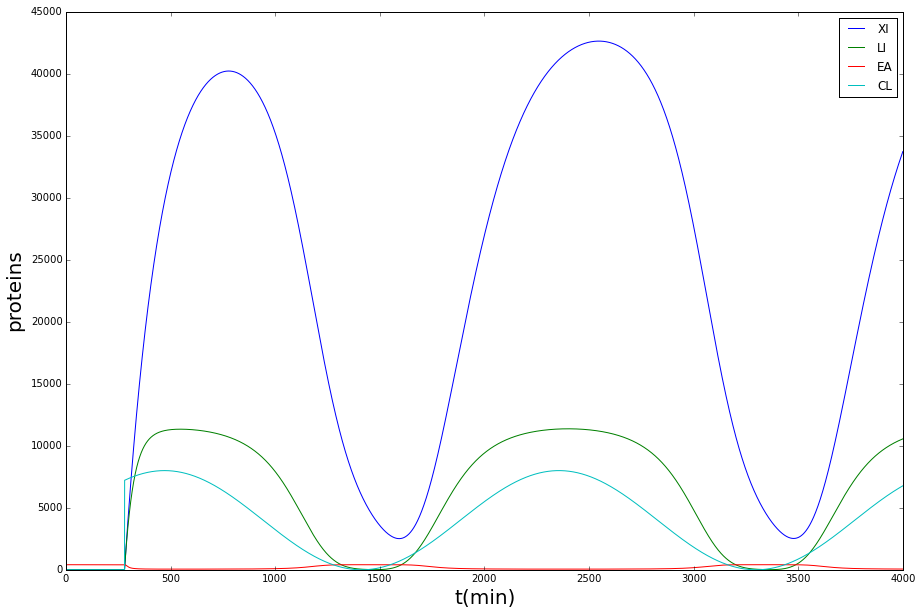

In [124]:
plot(t,XI,label='XI')
plot(t,LI,label='LI')
plot(t,EA,label='EA')
plot(t,CL,label='CL')
plt.xlabel('t(min)',size=20)
plt.ylabel('proteins',size=20)
legend()
figure(figsize(15,10))
plt.savefig("Cyanodet.png", format='png')